# CAR PRICE PREDICTION USING MACHINE LEARNING

### IMPORTING LIBRARIES AND DATASET

In [48]:
# Import libraries for pre-processing and data visualization
# numpy for working with numpy arrays and 
# matplotlib for plotting images
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC


In [3]:
#Import the dataset
data=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\PROJECTS\Cardata.csv" )

### EXPLORATORY DATA ANALYSIS

In [4]:
# Printing data
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.2,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Columns in dataset
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
# Print number of rows and columns
data.shape

(8128, 13)

In [7]:
# Print information about various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [8]:
# Statistics of the columns
data.describe()

,year,selling_price,km_driven,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418791,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037148,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [9]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.2,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
#Checking distribution of Categorical value
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       7078
Automatic    1050
Name: transmission, dtype: int64


In [11]:
#Encoding the Categorical Data
# encoding "Fuel" Column
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding "Seller_Type" Column
data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,First Owner,23.4,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,Second Owner,21.2,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,Third Owner,17.7,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,First Owner,23.0,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,First Owner,16.1,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data Visualization

<AxesSubplot:>

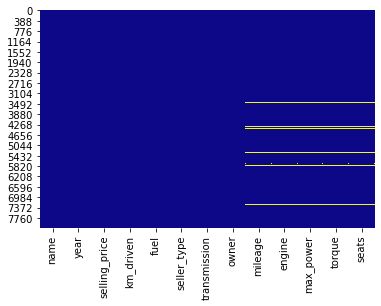

In [13]:
# Checking the null values in different columns
sns.heatmap(data=data.isnull(),cbar=False, cmap="plasma")

THE DATASET IS ABSOLUTELY FINE WITH NO MISSING VALUES

km_driven
1          AxesSubplot(0.125,0.125;0.775x0.755)
1000       AxesSubplot(0.125,0.125;0.775x0.755)
1300       AxesSubplot(0.125,0.125;0.775x0.755)
1303       AxesSubplot(0.125,0.125;0.775x0.755)
1500       AxesSubplot(0.125,0.125;0.775x0.755)
                           ...                 
475000     AxesSubplot(0.125,0.125;0.775x0.755)
500000     AxesSubplot(0.125,0.125;0.775x0.755)
577414     AxesSubplot(0.125,0.125;0.775x0.755)
1500000    AxesSubplot(0.125,0.125;0.775x0.755)
2360457    AxesSubplot(0.125,0.125;0.775x0.755)
Name: selling_price, Length: 921, dtype: object

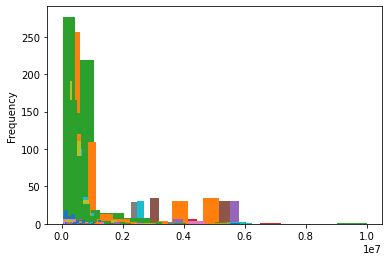

In [14]:
data["selling_price"].groupby(data["km_driven"]).plot(kind="hist")

mileage
0.00     AxesSubplot(0.125,0.125;0.775x0.755)
9.00     AxesSubplot(0.125,0.125;0.775x0.755)
9.50     AxesSubplot(0.125,0.125;0.775x0.755)
10.00    AxesSubplot(0.125,0.125;0.775x0.755)
10.10    AxesSubplot(0.125,0.125;0.775x0.755)
                         ...                 
32.26    AxesSubplot(0.125,0.125;0.775x0.755)
32.52    AxesSubplot(0.125,0.125;0.775x0.755)
33.00    AxesSubplot(0.125,0.125;0.775x0.755)
33.44    AxesSubplot(0.125,0.125;0.775x0.755)
42.00    AxesSubplot(0.125,0.125;0.775x0.755)
Name: selling_price, Length: 381, dtype: object

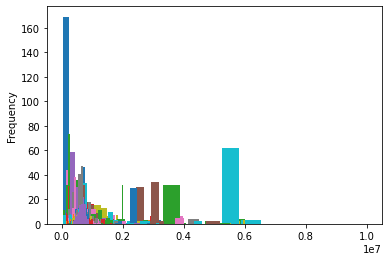

In [15]:
data["selling_price"].groupby(data["mileage"]).plot(kind="hist")

engine
624.0     AxesSubplot(0.125,0.125;0.775x0.755)
793.0     AxesSubplot(0.125,0.125;0.775x0.755)
796.0     AxesSubplot(0.125,0.125;0.775x0.755)
799.0     AxesSubplot(0.125,0.125;0.775x0.755)
814.0     AxesSubplot(0.125,0.125;0.775x0.755)
                          ...                 
2997.0    AxesSubplot(0.125,0.125;0.775x0.755)
2999.0    AxesSubplot(0.125,0.125;0.775x0.755)
3198.0    AxesSubplot(0.125,0.125;0.775x0.755)
3498.0    AxesSubplot(0.125,0.125;0.775x0.755)
3604.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: selling_price, Length: 121, dtype: object

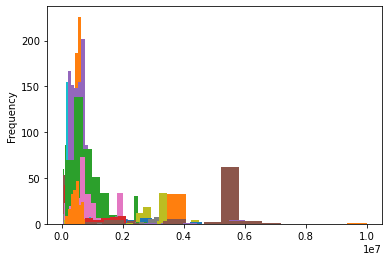

In [16]:
data["selling_price"].groupby(data["engine"]).plot(kind="hist")

## DATA CLEANING

In [17]:
data=data.dropna()

In [18]:
print('Missing values in column:' )
data.isnull().sum()

Missing values in column:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

<AxesSubplot:>

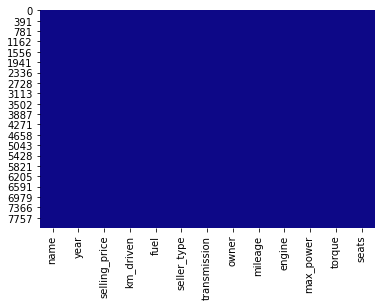

In [19]:
# Checking the null values in different columns
sns.heatmap(data=data.isnull(),cbar=False, cmap="plasma")

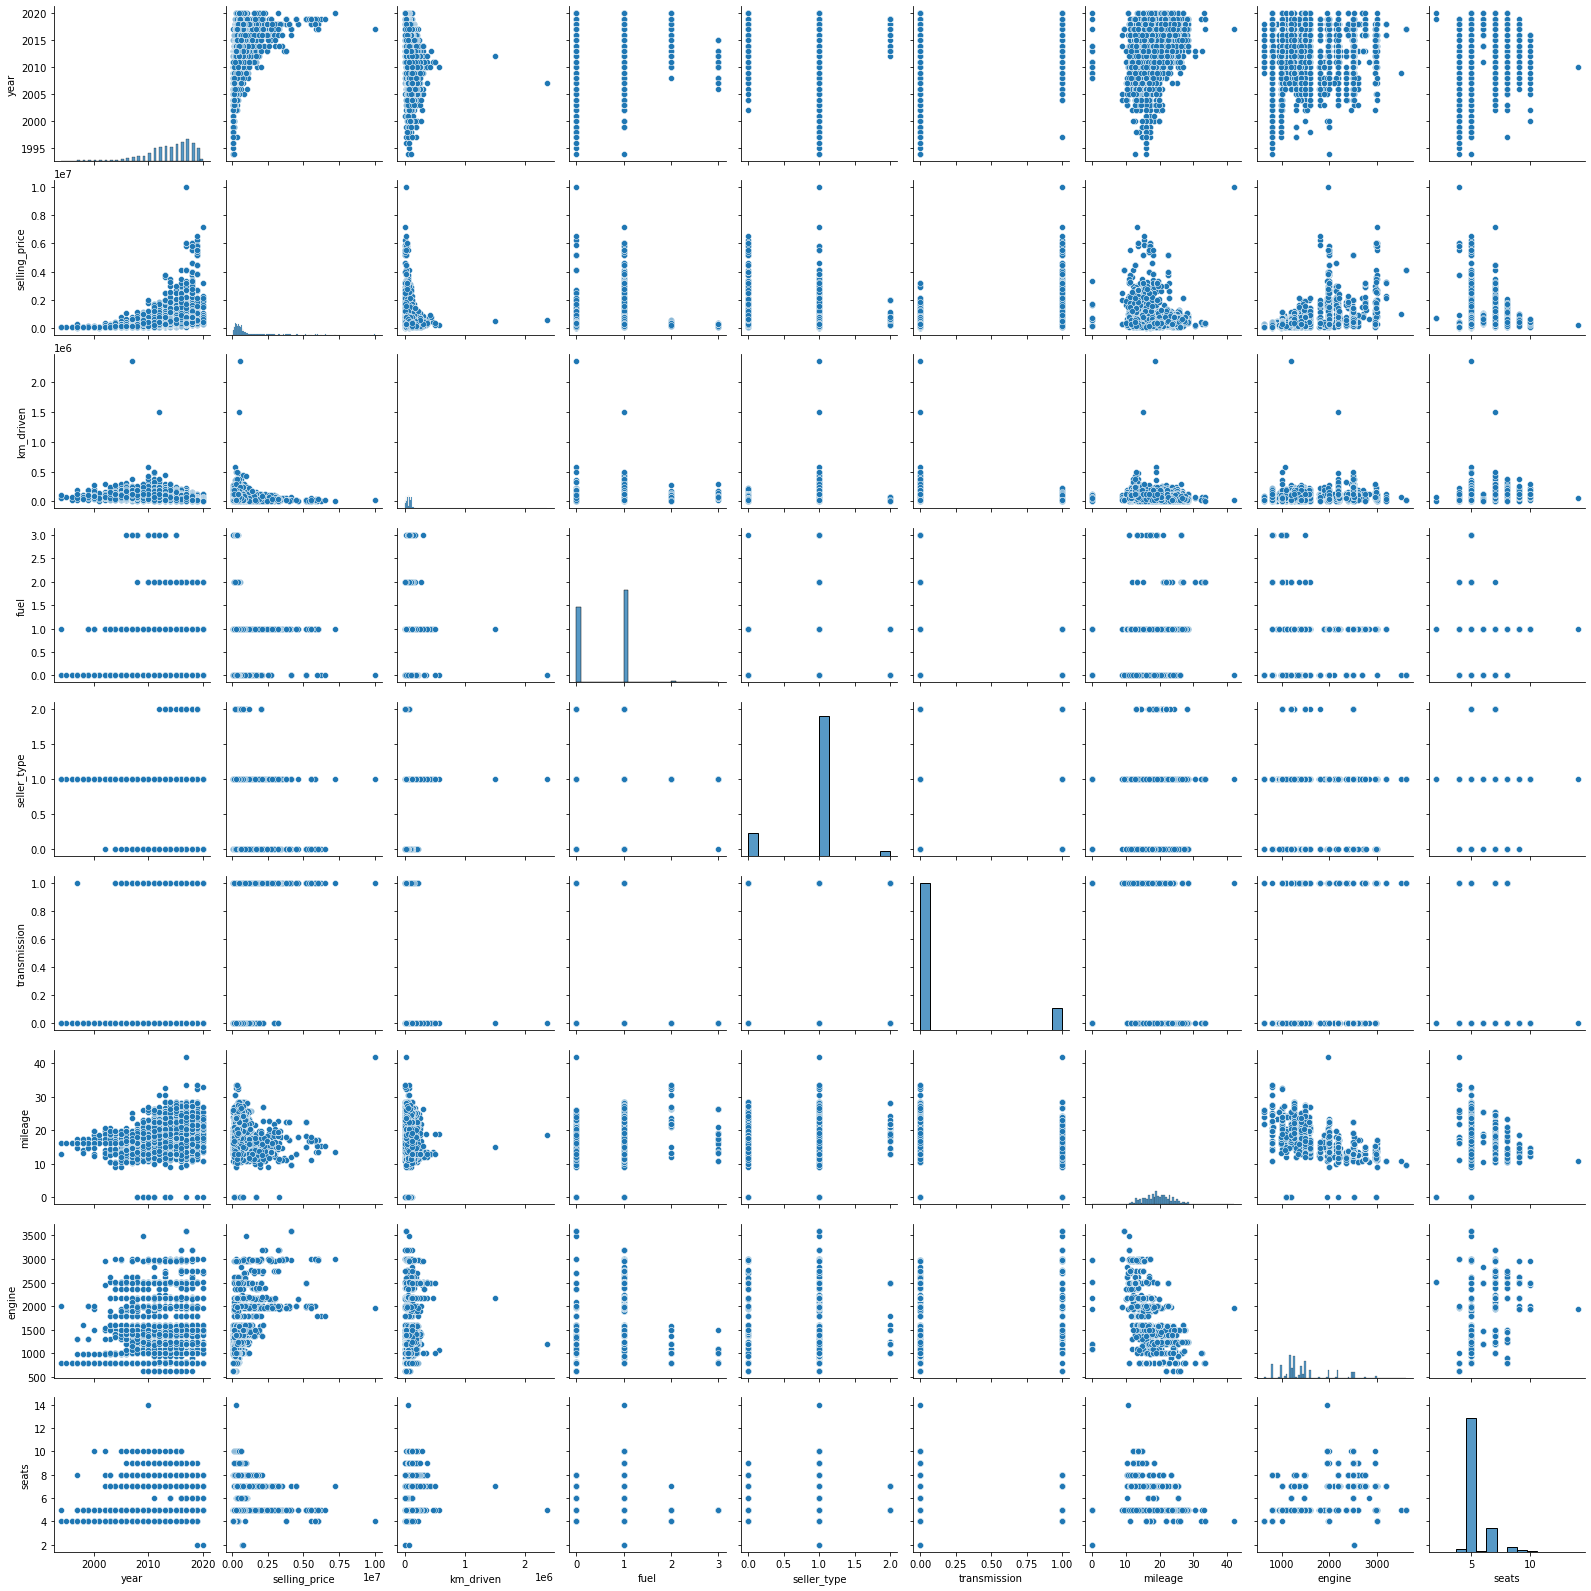

In [20]:
sns.pairplot(data)

## Feature Selection and Data Splitting

In [21]:
# Selecting features and target variable
X = data.loc[:,['mileage', 'engine', 'km_driven', ]]
Y = data[["selling_price"]]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Split data into train and test dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [24]:
print(X)

      mileage  engine  km_driven
0       23.40  1248.0     145500
1       21.20  1498.0     120000
2       17.70  1497.0     140000
3       23.00  1396.0     127000
4       16.10  1298.0     120000
...       ...     ...        ...
8123    18.50  1197.0     110000
8124    16.80  1493.0     119000
8125    19.30  1248.0     120000
8126    23.57  1396.0      25000
8127    23.57  1396.0      25000

[7906 rows x 3 columns]


In [25]:
print(Y)

      selling_price
0            450000
1            370000
2            158000
3            225000
4            130000
...             ...
8123         320000
8124         135000
8125         382000
8126         290000
8127         290000

[7906 rows x 1 columns]


## Model Training

### Linear Regression

In [76]:
# loading the linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
predict=lin_reg_model.predict(X_test)
model.score(X_test,Y_test)



0.03666245259165613

In [27]:
#Model Evaluation
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", (error_score))

R squared Error :  0.32668283900663786


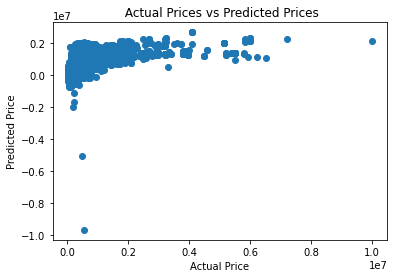

In [28]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [29]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.38056811375591837


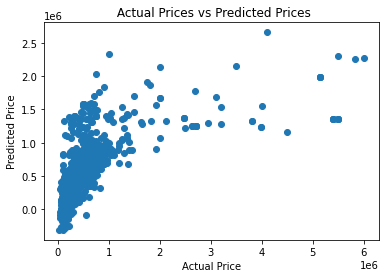

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## LASSO REGRESSION

In [77]:
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)
model.score(X_test, Y_test)


0.03666245259165613

R squared Error :  0.32668283900649164


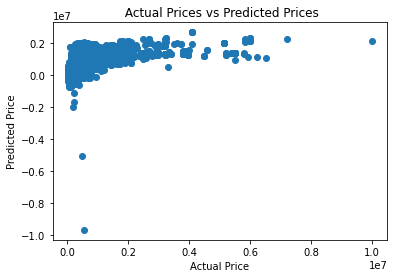

In [39]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


R squared Error :  0.3805680924246393


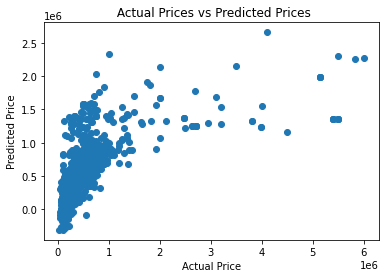

In [40]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## SUPPORT VECTOR MACHINE(SVM)

In [55]:
model = SVC()
model.fit(X_train, Y_train.values.ravel())

SVC()

In [57]:
predict_train = model.predict(X_train)
print('Target on train data',predict_train)

Target on train data [300000 550000 550000 ... 550000 300000 300000]


In [67]:
accuracy_train = accuracy_score(Y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)
error_score = metrics.r2_score(Y_train,predict_train)
print("R squared Error : ", error_score)

accuracy_score on train dataset :  0.03696416022487702
R squared Error :  0.007202102189639903


In [63]:
predict_test = model.predict(X_test)


In [68]:
accuracy_test = accuracy_score(Y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)
error_score = metrics.r2_score(Y_test,predict_test)
print("R squared Error : ", error_score)

accuracy_score on test dataset :  0.03666245259165613
R squared Error :  0.017591129978546838


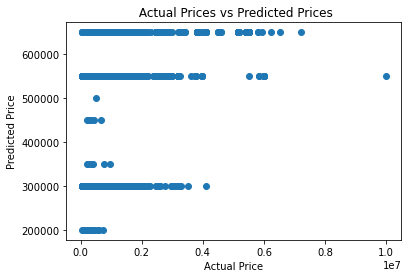

In [69]:
#Training data visulaization
plt.scatter(Y_train, predict_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

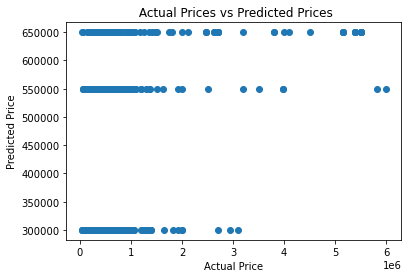

In [71]:
#Testting data visulaization
plt.scatter(Y_test, predict_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()